In [1]:
# %matplotlib widget
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import glob
from scipy import stats
from scipy.optimize import curve_fit
import scipy
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import read_data
from scipy.stats import itemfreq


In [2]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
plt.rcParams.update({'font.size': 15})

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

In [3]:
# Give component names in the order they apear in the scorep output
components = ["spreadParticleForce", "collideAndStream", "interpolateFluidVelocity", "syncEnvelopes", "advanceParticles", "applyConstitutiveModel", "deleteNonLocalParticles", "setExternalVector"]
raw_df = read_data.gen_df("./results", components)

Imbalance: <_io.TextIOWrapper name='./results/single-node-128-s9-h016-536075.out' mode='r' encoding='UTF-8'>
Biggest and smallest are not the same
Smallest: ['15', 'by', '25', 'by', '25\n']
Biggest: ['16', 'by', '25', 'by', '25\n']
Using largest subdomain as size
Imbalance: <_io.TextIOWrapper name='./results/single-node-128-s13-h016-533243.out' mode='r' encoding='UTF-8'>
Biggest and smallest are not the same
Smallest: ['12', 'by', '6', 'by', '6\n']
Biggest: ['13', 'by', '7', 'by', '7\n']
Using largest subdomain as size
Imbalance: <_io.TextIOWrapper name='./results/single-node-128-s9-h014-532325.out' mode='r' encoding='UTF-8'>
Biggest and smallest are not the same
Smallest: ['15', 'by', '25', 'by', '25\n']
Biggest: ['16', 'by', '25', 'by', '25\n']
Using largest subdomain as size
Imbalance: <_io.TextIOWrapper name='./results/single-node-128-s13-h000-536215.out' mode='r' encoding='UTF-8'>
Biggest and smallest are not the same
Smallest: ['12', 'by', '6', 'by', '6\n']
Biggest: ['13', 'by', 

In [4]:
fitting_sizes = ["s1", "s3", "s5", "s8", "s9", "s11", "s12"]
# testing_sizes = ["s2", "s4", "s7", "s10", "s13"]
testing_sizes = ["s2", "s4", "s7", "s10"]

fitting_df = raw_df[ raw_df['sizestr'].isin(fitting_sizes)]
testing_df = raw_df[ raw_df['sizestr'].isin(testing_sizes)]

data = []
for sizestr in np.sort(np.unique(raw_df['sizestr'])):
    tmp = raw_df.loc[raw_df['sizestr'] == sizestr]
    s = np.array(tmp['size'])[0]
    N = np.array(tmp['N'])[0]
    st = np.array(tmp['total_size'])[0]

    
    for H in np.sort(np.unique(raw_df.loc[raw_df['sizestr'] == sizestr]['H'])):
        n = np.unique(tmp.loc[tmp['H'] == H]['jobid']).size
        rbc = np.array(tmp.loc[tmp['H'] == H]['RBCs'])[0]


        data.append([sizestr, s, st, N, H, rbc, n])
        

exp_df = pd.DataFrame(data, columns=['sizestr', 'size', 'total_size', 'N', 'H', 'RBCs', 'n']).sort_values('N')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(exp_df)

raw_df

,sizestr,size,total_size,N,H,RBCs,n
34,s13,"(13, 7, 7)","(50, 50, 25)",637,18,0.078125,3
30,s13,"(13, 7, 7)","(50, 50, 25)",637,10,0.046875,3
31,s13,"(13, 7, 7)","(50, 50, 25)",637,12,0.078125,3
32,s13,"(13, 7, 7)","(50, 50, 25)",637,14,0.078125,3
33,s13,"(13, 7, 7)","(50, 50, 25)",637,16,0.062500,3
29,s13,"(13, 7, 7)","(50, 50, 25)",637,9,0.031250,3
28,s13,"(13, 7, 7)","(50, 50, 25)",637,0,0.078125,3
16,s11,"(13, 13, 13)","(100, 50, 50)",2197,10,0.234375,3
20,s11,"(13, 13, 13)","(100, 50, 50)",2197,18,0.390625,3
19,s11,"(13, 13, 13)","(100, 50, 50)",2197,16,0.390625,3


,jobid,sizestr,size,total_size,N,area,RBCs,H,component,total,comm,comp
0,536075,s9,"(16, 25, 25)","(125, 100, 100)",10000,2850,2.34375,16,spreadParticleForce,0.933593,0.450001,0.483592
1,536075,s9,"(16, 25, 25)","(125, 100, 100)",10000,2850,2.34375,16,collideAndStream,4.436620,1.148580,3.288040
2,536075,s9,"(16, 25, 25)","(125, 100, 100)",10000,2850,2.34375,16,interpolateFluidVelocity,0.476320,0.322047,0.154273
3,536075,s9,"(16, 25, 25)","(125, 100, 100)",10000,2850,2.34375,16,syncEnvelopes,0.917746,0.689389,0.228357
4,536075,s9,"(16, 25, 25)","(125, 100, 100)",10000,2850,2.34375,16,advanceParticles,1.357760,1.081030,0.276732
...,...,...,...,...,...,...,...,...,...,...,...,...
2043,536195,s12,"(41, 25, 25)","(328, 100, 100)",25625,5350,6.25000,12,syncEnvelopes,1.107280,0.707243,0.400036
2044,536195,s12,"(41, 25, 25)","(328, 100, 100)",25625,5350,6.25000,12,advanceParticles,2.524200,1.854710,0.669495
2045,536195,s12,"(41, 25, 25)","(328, 100, 100)",25625,5350,6.25000,12,applyConstitutiveModel,0.310551,0.159262,0.151289
2046,536195,s12,"(41, 25, 25)","(328, 100, 100)",25625,5350,6.25000,12,deleteNonLocalParticles,0.154743,0.000000,0.154743


# Fitting

collideAndStream
2.6541003527985865 + (xs \times ys \times zs) * 0.00020076190100649767
setExternalVector
0.1568629274096267 + (xs \times ys \times zs) * 3.0557428451375e-05
collideAndStream
0.25823615018164414 + (xs, ys, zs) * 0.00026029203962343606
syncEnvelopes
0.07828840234367496 + RBCs * 0.05786462401269385
advanceParticles
0.15217004759318975 + RBCs * 0.0716656098120107
applyConstitutiveModel
0.03848614248883475 + RBCs * 0.019508461069449746
deleteNonLocalParticles
0.04689452743460282 + RBCs * 0.012111708596878728
spreadParticleForce
0.25393709202688797 + RBCs * 0.1967781763192387
interpolateFluidVelocity
0.14512805024934683 + RBCs * 0.03971178685526732
syncEnvelopes
0.5444131234835587 + (xs, ys, zs) * -1.2159063547030089e-05 + RBCs * 0.030358771219139366


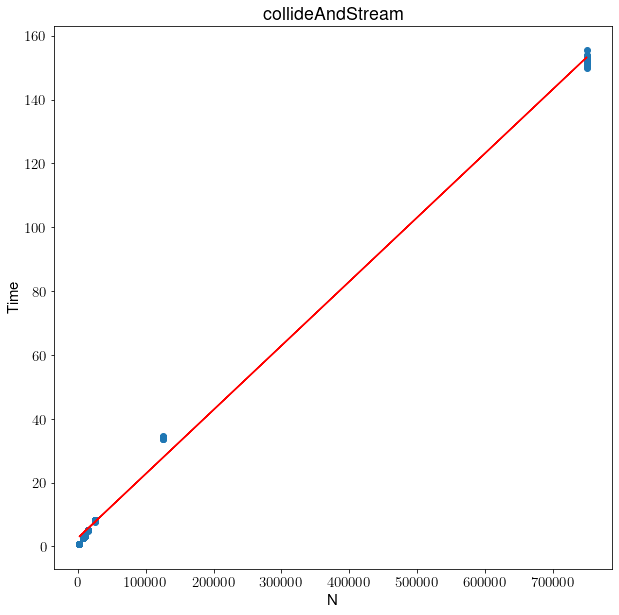

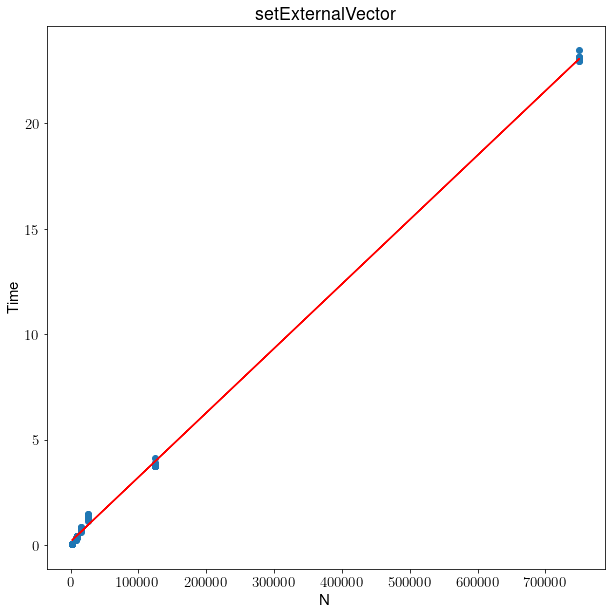

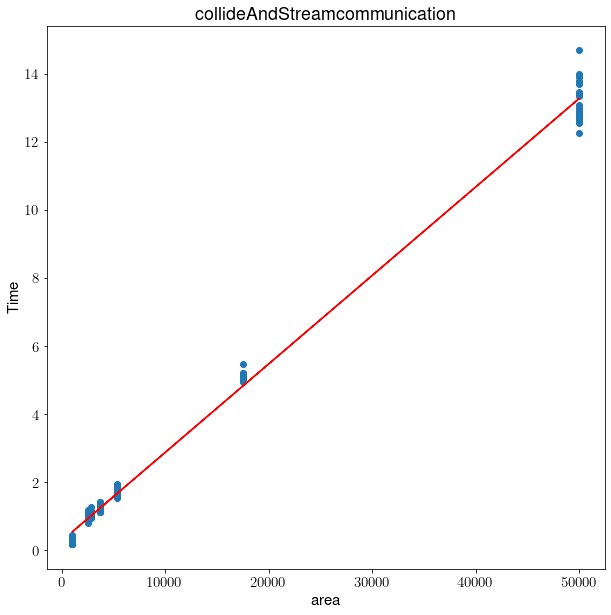

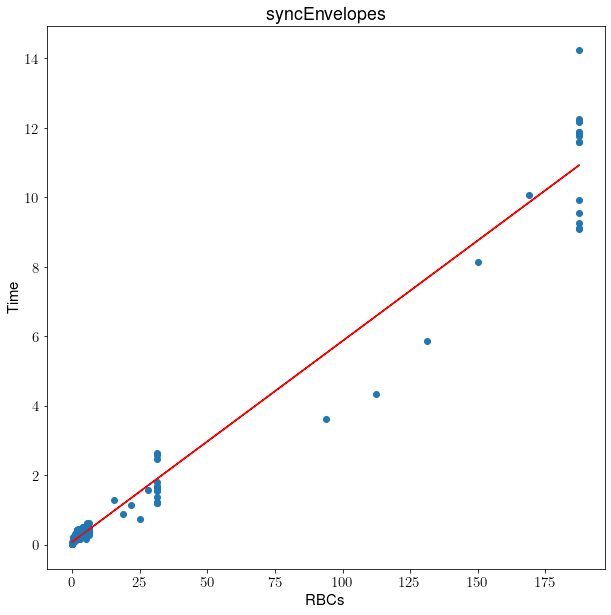

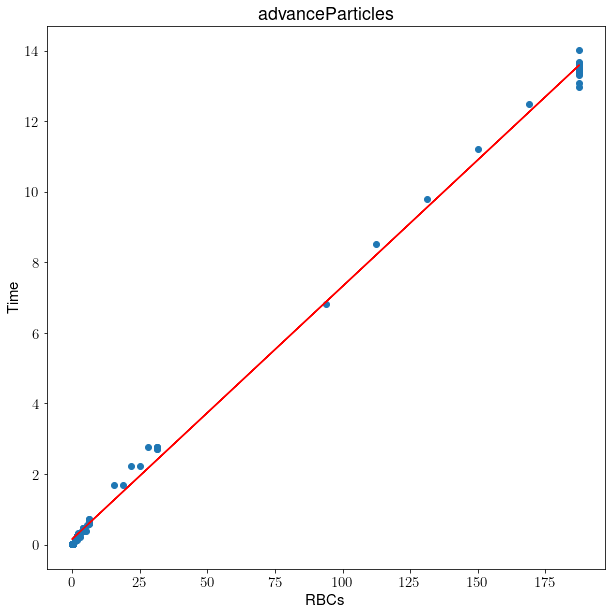

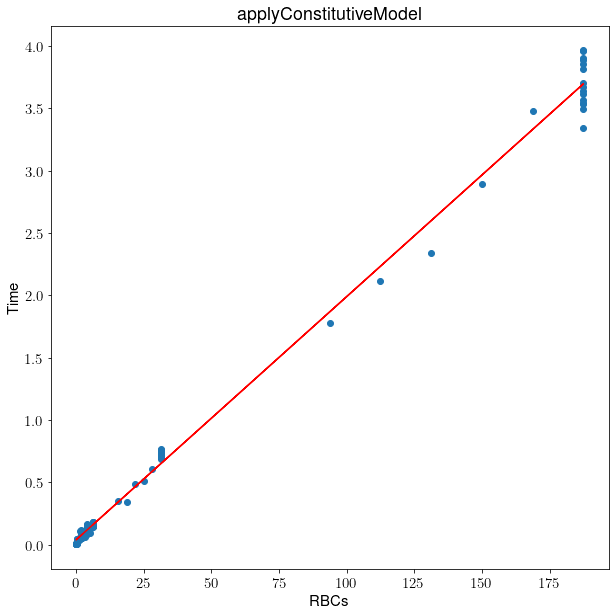

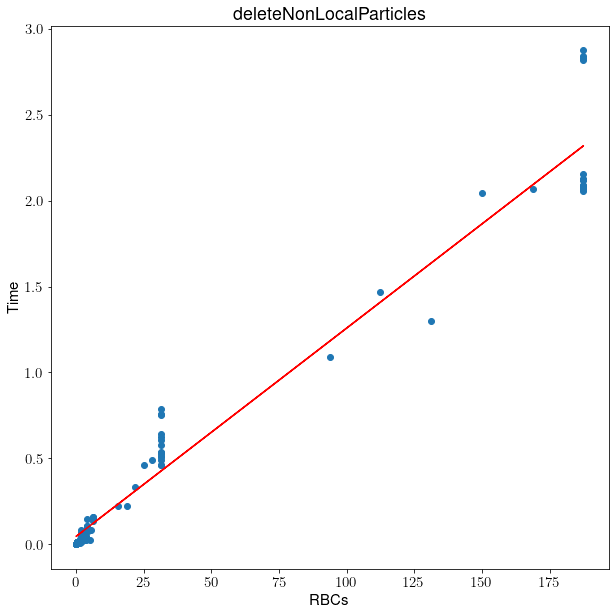

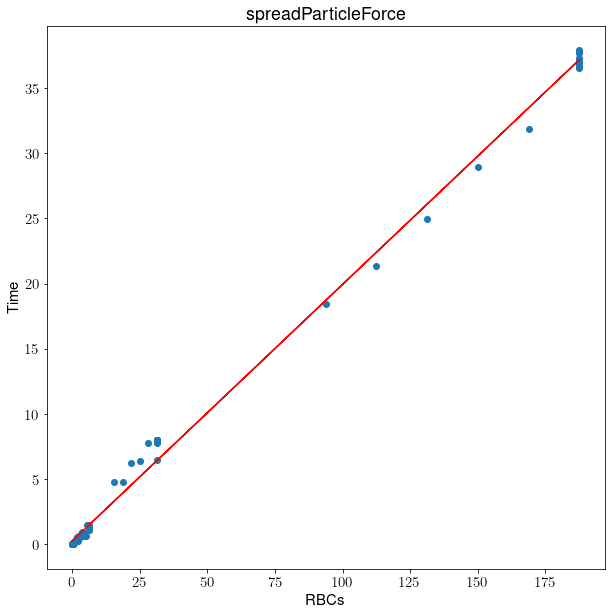

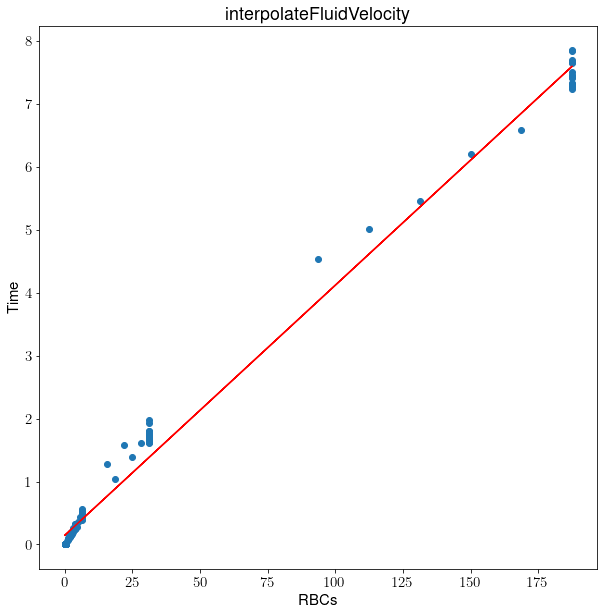

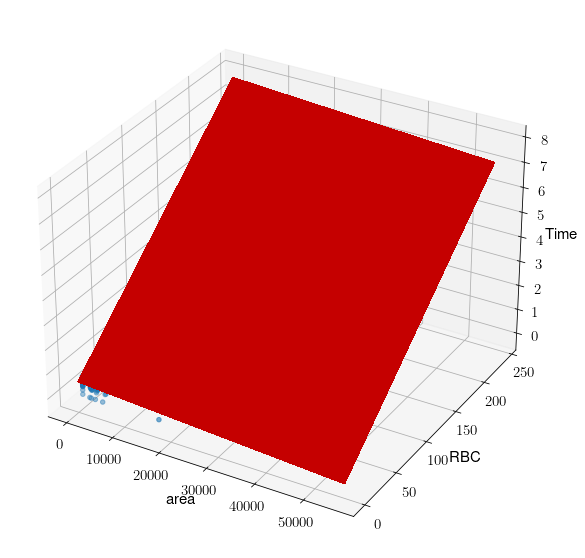

In [5]:
models = {}

for component in ["collideAndStream", "setExternalVector"]:
    plt.figure(figsize=(10, 10))
    
    tmpdf = fitting_df.loc[fitting_df['component'] == component]    
    plt.scatter(tmpdf['N'], tmpdf['comp'])
    
    res = stats.linregress(tmpdf['N'], tmpdf['comp'])
    plt.plot(tmpdf['N'], res.intercept + res.slope*tmpdf['N'], 'r', label='fitted line')
    models[component] = res

    plt.title(str(component))
    plt.xlabel("N")
    plt.ylabel("Time")
#     plt.show()

    print(component)
    print("{} + (xs \\times ys \\times zs) * {}".format(res.intercept, res.slope))
    

for component in ["collideAndStream"]:
    plt.figure(figsize=(10, 10))
    
    tmpdf = fitting_df.loc[fitting_df['component'] == component]    
    plt.scatter(tmpdf['area'], tmpdf['comm'])

    res = stats.linregress(tmpdf['area'], tmpdf['comm'])
    models[component+"_comm"] = res
    plt.plot(tmpdf['area'], res.intercept + res.slope*tmpdf['area'], 'r', label='fitted line')
    
    plt.title(str(component) + "communication")
    plt.xlabel("area")
    plt.ylabel("Time")
#     plt.show()
    print(component)
    print("{} + (xs, ys, zs) * {}".format(res.intercept, res.slope))

    
for component in ["syncEnvelopes", "advanceParticles", "applyConstitutiveModel", "deleteNonLocalParticles", "spreadParticleForce", "interpolateFluidVelocity"]:
    plt.figure(figsize=(10, 10))
    
    tmpdf = fitting_df.loc[fitting_df['component'] == component]

    plt.scatter(tmpdf['RBCs'], tmpdf['comp'])
    
    res = stats.linregress(tmpdf['RBCs'], tmpdf['comp'])
    models[component] = res

    plt.plot(tmpdf['RBCs'], res.intercept + res.slope*tmpdf['RBCs'], 'r', label='fitted line')
    plt.title(str(component))
    plt.xlabel("RBCs")
    plt.ylabel("Time")
    print(component)
    print("{} + RBCs * {}".format(res.intercept, res.slope))

#     plt.show()

def function_calc(x, a, b, c):
    return a + b*x[0] + c*x[1]
    
for component in ["syncEnvelopes"]:
    plt.figure(figsize=(10, 10))
    ax = plt.axes(projection='3d')
    
    tmpdf = fitting_df.loc[fitting_df['component'] == component]    
    ax.scatter(tmpdf['area'], tmpdf['RBCs'], tmpdf['comm'])
    
    popt, pcov = curve_fit(function_calc, [tmpdf['area'],tmpdf['RBCs']], tmpdf['comm'])
    models[component+"_comm"] = popt
    # Make data.
    X = np.arange(0, 60000, 4000)
    Y = np.arange(0, 250, 12)
    X, Y = np.meshgrid(X, Y)
    Z = np.array(popt[0] + X*popt[1] + Y*popt[2])
    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, color='r', linewidth=0, antialiased=False)    
    ax.set_xlabel("area")
    ax.set_ylabel("RBC")
    ax.set_zlabel("Time")
#     plt.show()
    print(component)
    print("{} + (xs, ys, zs) * {} + RBCs * {}".format(popt[0], popt[1], popt[2]))


In [6]:
def run_model(models, size, RBCs):
    total = 0
    for component in ["collideAndStream", "setExternalVector"]:
        res = models[component]
        total += res.intercept + res.slope *  size[0] * size[1] * size[2]
    
    for component in ["collideAndStream_comm"]:
        res = models[component]
        total += res.intercept + res.slope *  2*((size[0]*size[1])+(size[0]*size[2])+(size[1]*size[2]))
        
    for component in ["syncEnvelopes", "advanceParticles", "applyConstitutiveModel", "deleteNonLocalParticles", "spreadParticleForce", "interpolateFluidVelocity"]:
        res = models[component]
        total += res.intercept + res.slope * RBCs
        
    for component in ["syncEnvelopes_comm"]:
        popt = models[component]
        total += popt[0] + 2*((size[0]*size[1])+(size[0]*size[2])+(size[1]*size[2]))*popt[1] + RBCs*popt[2]
    
    return total

In [7]:
print(run_model(models, (100, 100, 100), 0))
print([run_model(models, (100, 50, 100), 0) * 3 for x in [0]])
print([run_model(models, (100, 150, 100), 0) for x in [0]])

250.535824838467
[389.7405017640076]
[371.1581490889314]


<Figure size 1440x1440 with 0 Axes>

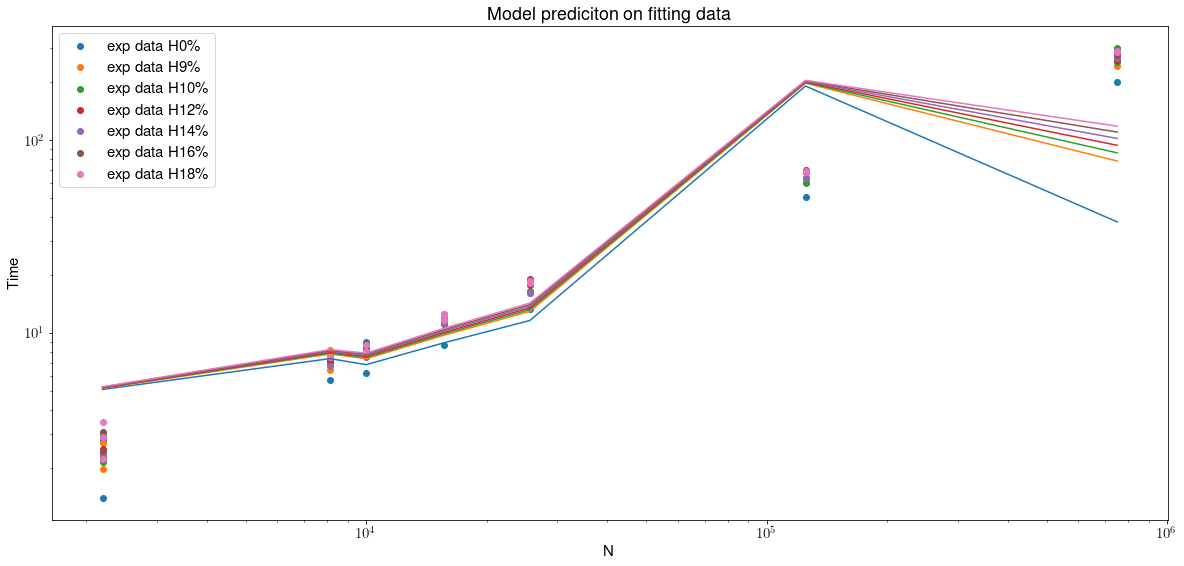

,size,RBCs,mean,std,prediction,mse
0,"(13, 13, 13)",0.000000,1.397692,0.000000,5.088332,13.62
1,"(16, 25, 25)",0.000000,6.179606,0.000000,7.348889,1.37
2,"(25, 25, 13)",0.000000,5.720483,0.000000,6.840725,1.25
3,"(25, 25, 25)",0.000000,8.662427,0.000000,8.873380,0.04
4,"(41, 25, 25)",0.000000,13.305462,0.000000,11.583586,2.96
5,"(75, 100, 100)",0.000000,200.279810,0.000000,190.224663,101.11
6,"(100, 50, 25)",0.000000,50.641068,0.000000,37.585760,170.44
7,"(13, 13, 13)",0.156250,1.975866,0.000000,5.155207,10.11
8,"(25, 25, 13)",1.171875,6.946010,0.000000,7.342287,0.16
9,"(25, 25, 25)",1.953125,11.111799,0.000000,9.709316,1.97


In [8]:
ids = np.unique(fitting_df['jobid'])

new_data = []

for i in ids:
    tmpdf = raw_df.loc[raw_df['jobid'] == i]
    new_data.append([i, np.array(tmpdf['N'])[0], np.array(tmpdf['size'])[0], np.array(tmpdf['RBCs'])[0], np.array(tmpdf['H'])[0], np.array(tmpdf['total']).sum()])

tmpdf = pd.DataFrame(new_data, columns=['jobid', 'N', 'size', 'RBCs', 'H', 'total'])
plt.figure(figsize=(20, 20))

# print(tmpdf)    print(d['N'])

def unique(x, axis=0):
    seen = []
    new = []
    
    for tmp in x:
        if tmp[axis] not in seen:
            seen.append(tmp[axis])
            new.append(tmp)
    return np.sort(np.array(new, dtype=object), axis=0)

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(2, 1, 1)


new_data = []
for H in set(tmpdf['H']):
    d = tmpdf.loc[tmpdf['H'] == H]
    plt.scatter(d['N'], d['total'], label='exp data H{}\%'.format(H))
    setups = unique([list(x) for x in zip(d['N'], d['size'], d['RBCs'])])
    predictions = [ run_model(models, s, r) for _, s, r in setups]
    plt.plot(setups[:,0], predictions)
    
    for _, size, rbc in setups:
        tmp = tmpdf.loc[tmpdf['size'] == size]
        tmp = tmp.loc[tmpdf['RBCs'] == rbc]
        if len(tmp['total']) == 0:
            continue

        prediciton = run_model(models, size, rbc)
        mse = ((np.array(tmp['total']) - prediciton)**2).mean()
#         rse = ((tmp['total'] - prediciton) ** 2).sum() / ((tmp['total'] - tmp['total'].mean()) ** 2).sum()
        new_data.append([size, rbc, np.mean(tmp['total']), np.std(np.array(tmp['total'])), prediciton, mse.round(2)])


plt.legend()

plt.title("Model prediciton on fitting data")
plt.xlabel("N")
plt.ylabel("Time")
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()

predictiondf = pd.DataFrame(new_data, columns=['size', 'RBCs', 'mean', 'std', 'prediction', 'mse'])
predictiondf

([<matplotlib.axis.XTick at 0x7f9f78380580>,
 [Text(0, 0, '(13, 13, 13)'),
  Text(1, 0, '(25, 25, 13)'),
  Text(2, 0, '(16, 25, 25)'),
  Text(3, 0, '(25, 25, 25)'),
  Text(4, 0, '(41, 25, 25)'),
  Text(5, 0, '(100, 50, 25)'),
  Text(6, 0, '(75, 100, 100)')])

<Figure size 1440x1440 with 0 Axes>

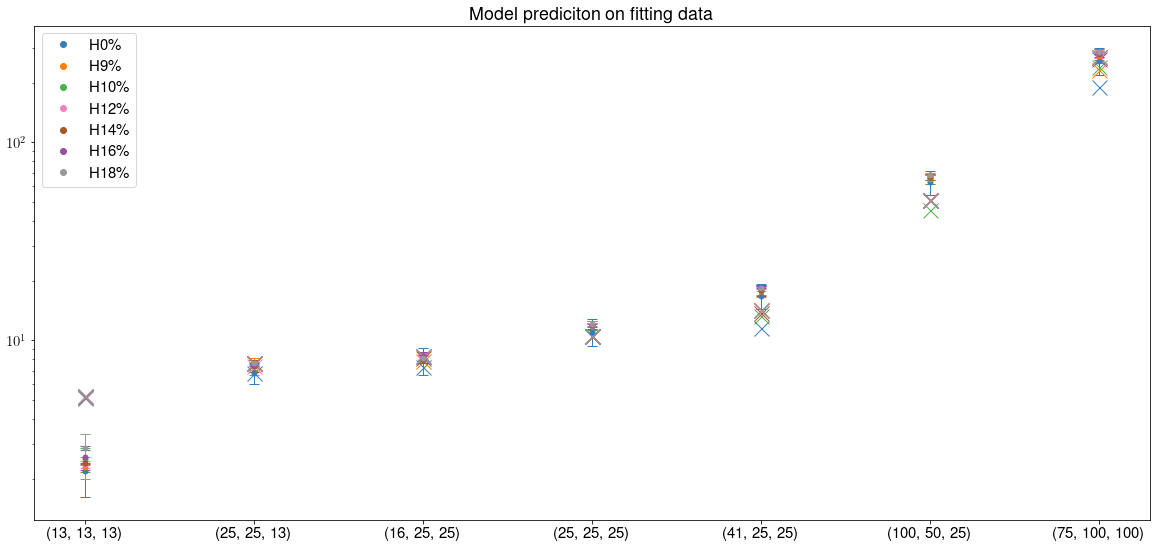

In [9]:
ids = np.unique(fitting_df['jobid'])

new_data = []

for i in ids:
    tmpdf = raw_df.loc[raw_df['jobid'] == i]
    new_data.append([i, np.array(tmpdf['N'])[0], np.array(tmpdf['size'])[0], np.array(tmpdf['RBCs'])[0], np.array(tmpdf['H'])[0], np.array(tmpdf['total']).sum()])

tmpdf = pd.DataFrame(new_data, columns=['jobid', 'N', 'size', 'RBCs', 'H', 'total'])
plt.figure(figsize=(20, 20))

# print(tmpdf)    print(d['N'])

def unique(x, axis=0):
    seen = []
    new = []
    
    for tmp in x:
        if tmp[axis] not in seen:
            seen.append(tmp[axis])
            new.append(tmp)
    return np.sort(np.array(new, dtype=object), axis=0)

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(2, 1, 1)

fit_exp_df = exp_df.loc[exp_df['sizestr'].isin(fitting_sizes)].sort_values("N")
# print(fit_exp_df)


for i, sizestr in enumerate(pd.unique(fit_exp_df['sizestr'])):
    s = np.array(fit_exp_df.loc[fit_exp_df['sizestr'] == sizestr]['size'])[0]
    
    legend_handels = []
    for hi, H in enumerate(np.unique(np.sort(fit_exp_df['H']))):
        t = fit_exp_df.loc[fit_exp_df['sizestr'] == sizestr]
        r = np.array(t.loc[t['H'] == H]['RBCs'])[0]

        tmp = tmpdf.loc[tmpdf['H'] == H]
        tmp = tmp.loc[tmp['size'] == s]
        
        plt.errorbar(i, np.mean(tmp['total']), yerr=np.std(tmp['total']), ms=10, color=CB_color_cycle[hi], fmt=".", capsize=5, lw=1, )
        plt.plot(i, run_model(models, s, r), 'x', color=CB_color_cycle[hi], ms=15)
        
        legend_handels.append( Line2D([0], [0], color=CB_color_cycle[hi], lw=0, marker='o', label='H{}\%'.format(H)))
        

plt.title("Model prediciton on fitting data")
plt.legend(handles=legend_handels)
ax.set_yscale('log')
# plt.xticks(, pd.unique(fit_exp_df['sizestr']), rotation='vertical')
plt.xticks(range(np.unique(np.sort(fit_exp_df['sizestr'])).size), [np.array(fit_exp_df.loc[fit_exp_df['sizestr']==x]['size'])[0] for x in pd.unique(fit_exp_df['sizestr'])])


In [10]:
ids = np.unique(fitting_df['jobid'])

new_data = []

sizes = np.unique(fitting_df['size'])
RBCs = np.unique(fitting_df['RBCs'])

for c in components:
    for size in sizes:
        for RBC in RBCs:
            tmpdf = fitting_df.loc[fitting_df['component'] == c]
            tmpdf = tmpdf.loc[tmpdf['size'] == size]
            tmpdf = tmpdf.loc[tmpdf['RBCs'] == RBC]
            if len(tmpdf['comp']) == 0:
                continue
            
            if c in ["collideAndStream", "setExternalVector"]:
                res = models[c]
                prediction = res.intercept + res.slope *  size[0] * size[1] * size[2]

            if c in ["syncEnvelopes", "advanceParticles", "applyConstitutiveModel", "deleteNonLocalParticles", "spreadParticleForce", "interpolateFluidVelocity"]:
                res = models[c]
                prediction = res.intercept + res.slope * RBC
            
            mse = ((tmpdf['comp'] - prediction) ** 2).mean()
            new_data.append([c, size, RBC, np.array(tmpdf['comp']).mean(), np.array(tmpdf['comp']).std(), prediction, mse])
            
            if not np.all(tmpdf['comm']==0):
                if c in ["syncEnvelopes"]:
                    popt = models[c+"_comm"]
                    prediction = popt[0] + 2*((size[0]*size[1])+(size[0]*size[2])+(size[1]*size[2]))*popt[1] + RBC*popt[2]
                if c in ["collideAndStream"]:
                    res = models[c + "_comm"]
                    prediction = res.intercept + res.slope *  2*((size[0]*size[1])+(size[0]*size[2])+(size[1]*size[2]))
                
                mse = ((tmpdf['comm'] - prediction)** 2).mean() 
                new_data.append([c+'_comm', size, RBC, np.array(tmpdf['comm']).mean(), np.array(tmpdf['comm']).std(), prediction, mse.round(2)])

predictiondf = pd.DataFrame(new_data, columns=['component', 'size', 'RBCs', 'mean', 'std', 'prediction', 'mse'])
predictiondf.loc[predictiondf['component'] == 'collideAndStream']

,component,size,RBCs,mean,std,prediction,mse
94,collideAndStream,"(13, 13, 13)",0.000000,0.721647,0.000000,3.095174,5.633632
96,collideAndStream,"(13, 13, 13)",0.156250,0.787450,0.000000,3.095174,5.325591
98,collideAndStream,"(13, 13, 13)",0.234375,0.737866,0.062713,3.095174,5.560833
100,collideAndStream,"(13, 13, 13)",0.312500,0.718279,0.083130,3.095174,5.656539
102,collideAndStream,"(13, 13, 13)",0.390625,0.787695,0.046951,3.095174,5.326663
104,collideAndStream,"(16, 25, 25)",0.000000,3.134510,0.000000,4.661719,2.332368
106,collideAndStream,"(16, 25, 25)",1.171875,3.268680,0.000000,4.661719,1.940559
108,collideAndStream,"(16, 25, 25)",1.406250,3.346470,0.000000,4.661719,1.729881
110,collideAndStream,"(16, 25, 25)",1.640625,3.329850,0.000000,4.661719,1.773876
112,collideAndStream,"(16, 25, 25)",1.875000,3.342350,0.000000,4.661719,1.740736


# Prediciton

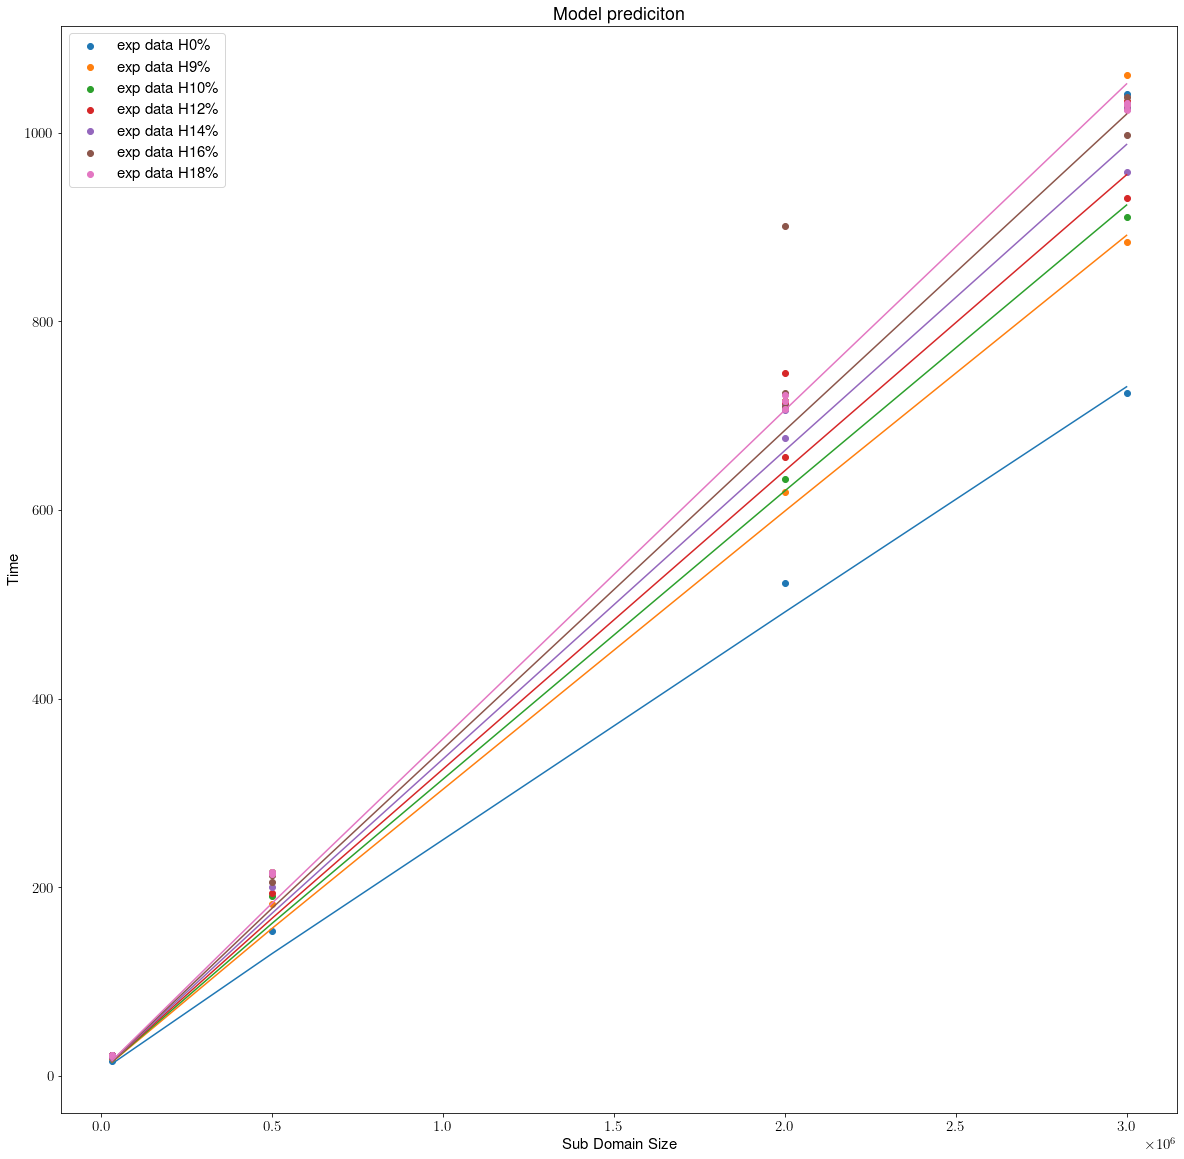

,size,RBCs,mean,std,prediction,mse
0,"(50, 25, 25)",0.00000,16.329977,0.000000,13.108077,10.38
1,"(100, 100, 50)",0.00000,153.547450,0.000000,129.913501,558.56
2,"(100, 200, 100)",0.00000,522.493558,0.000000,491.780473,943.29
3,"(150, 200, 100)",0.00000,724.440675,0.000000,730.543792,37.25
4,"(50, 25, 25)",3.90625,19.651859,0.000000,14.779949,23.74
5,"(100, 100, 50)",62.50000,182.851488,0.000000,156.663447,685.81
6,"(100, 200, 100)",250.00000,618.933150,0.000000,598.780258,406.14
7,"(150, 200, 100)",375.00000,884.404950,0.000000,891.043469,44.07
8,"(50, 25, 25)",4.68750,20.073543,0.000000,15.114323,24.59
9,"(100, 100, 50)",75.00000,190.920616,0.000000,162.013436,835.63


In [11]:
ids = np.unique(testing_df['jobid'])

new_data = []

for i in ids:
    tmpdf = raw_df.loc[raw_df['jobid'] == i]
    new_data.append([i, np.array(tmpdf['N'])[0], np.array(tmpdf['size'])[0], np.array(tmpdf['RBCs'])[0], np.array(tmpdf['H'])[0], np.array(tmpdf['total']).sum()])

tmpdf = pd.DataFrame(new_data, columns=['jobid', 'N', 'size', 'RBCs', 'H', 'total'])
plt.figure(figsize=(20, 20))

# print(tmpdf)    print(d['N'])

def unique(x, axis=0):
    seen = []
    new = []
    
    for tmp in x:
        if tmp[axis] not in seen:
            seen.append(tmp[axis])
            new.append(tmp)
    return np.array(new, dtype=object)

new_data = []
for H in set(tmpdf['H']):
    d = tmpdf.loc[tmpdf['H'] == H]
    plt.scatter(d['N'], d['total'], label='exp data H{}\%'.format(H))
    setups = unique([list(x) for x in zip(d['N'], d['size'], d['RBCs'])])
    predictions = [ run_model(models, s, r) for _, s, r in setups]
    plt.plot(setups[:,0], predictions)
    
    for _, size, rbc in setups:
        tmp = tmpdf.loc[tmpdf['size'] == size]
        tmp = tmp.loc[tmpdf['RBCs'] == rbc]
        if len(tmp['total']) == 0:
            continue

        prediciton = run_model(models, size, rbc)
        mse = ((np.array(tmp['total']) - prediciton)**2).mean()
#         rse = ((tmp['total'] - prediciton) ** 2).sum() / ((tmp['total'] - tmp['total'].mean()) ** 2).sum()

        new_data.append([size, rbc, np.mean(tmp['total']), np.std(np.array(tmp['total'])), prediciton, mse.round(2)])



plt.legend()

plt.title("Model prediciton")
plt.xlabel("Sub Domain Size")
plt.ylabel("Time")
plt.savefig("Model_prediction.pdf")
plt.show()

predictiondf = pd.DataFrame(new_data, columns=['size', 'RBCs', 'mean', 'std', 'prediction', 'mse'])
predictiondf

<Figure size 1080x1080 with 0 Axes>

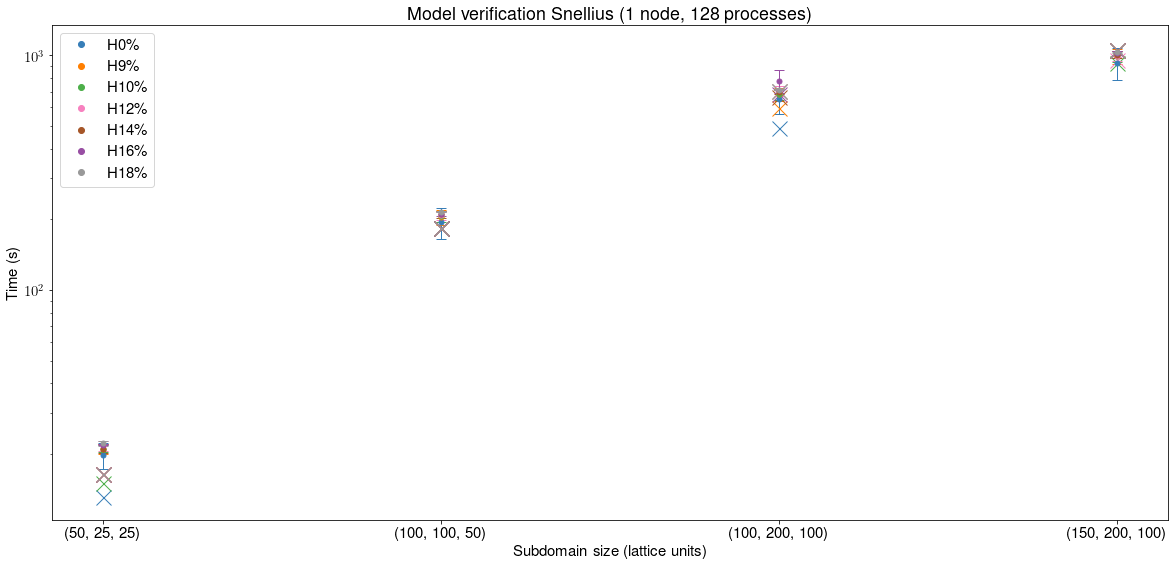

In [12]:
ids = np.unique(testing_df['jobid'])

new_data = []

for i in ids:
    tmpdf = raw_df.loc[raw_df['jobid'] == i]
    new_data.append([i, np.array(tmpdf['N'])[0], np.array(tmpdf['size'])[0], np.array(tmpdf['RBCs'])[0], np.array(tmpdf['H'])[0], np.array(tmpdf['total']).sum()])

tmpdf = pd.DataFrame(new_data, columns=['jobid', 'N', 'size', 'RBCs', 'H', 'total'])
plt.figure(figsize=(15, 15))

# print(tmpdf)    print(d['N'])

def unique(x, axis=0):
    seen = []
    new = []
    
    for tmp in x:
        if tmp[axis] not in seen:
            seen.append(tmp[axis])
            new.append(tmp)
    return np.sort(np.array(new, dtype=object), axis=0)

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(2, 1, 1)

fit_exp_df = exp_df.loc[exp_df['sizestr'].isin(testing_sizes)].sort_values("N")
# print(fit_exp_df)


for i, sizestr in enumerate(pd.unique(fit_exp_df['sizestr'])):
    s = np.array(fit_exp_df.loc[fit_exp_df['sizestr'] == sizestr]['size'])[0]
    
    legend_handels = []
    for hi, H in enumerate(np.unique(np.sort(fit_exp_df['H']))):
        t = fit_exp_df.loc[fit_exp_df['sizestr'] == sizestr]
        r = np.array(t.loc[t['H'] == H]['RBCs'])[0]

        tmp = tmpdf.loc[tmpdf['H'] == H]
        tmp = tmp.loc[tmp['size'] == s]
        
        plt.errorbar(i, np.mean(tmp['total']), yerr=np.std(tmp['total']), ms=10, color=CB_color_cycle[hi], fmt=".", capsize=5, lw=1, )
        plt.plot(i, run_model(models, s, r), 'x', color=CB_color_cycle[hi], ms=15)
        
        legend_handels.append( Line2D([0], [0], color=CB_color_cycle[hi], lw=0, marker='o', label='H{}\%'.format(H)))
        

plt.legend(handles=legend_handels)
ax.set_yscale('log')
plt.ylabel("Time (s)")
plt.xlabel("Subdomain size (lattice units)")
plt.title("Model verification Snellius (1 node, 128 processes)")
# plt.xticks(, pd.unique(fit_exp_df['sizestr']), rotation='vertical')
plt.xticks(range(np.unique(np.sort(fit_exp_df['sizestr'])).size), [np.array(fit_exp_df.loc[fit_exp_df['sizestr']==x]['size'])[0] for x in pd.unique(fit_exp_df['sizestr'])])
# plt.tight_layout()
plt.savefig("model-prediction.png", bbox_inches='tight', dpi=300)

In [13]:
testing_df

,jobid,sizestr,size,total_size,N,area,RBCs,H,component,total,comm,comp
32,535851,s2,"(50, 25, 25)","(400, 100, 100)",31250,6250,7.81250,16,spreadParticleForce,3.053270,1.520030,1.533240
33,535851,s2,"(50, 25, 25)","(400, 100, 100)",31250,6250,7.81250,16,collideAndStream,11.748100,1.890370,9.857710
34,535851,s2,"(50, 25, 25)","(400, 100, 100)",31250,6250,7.81250,16,interpolateFluidVelocity,1.053110,0.530720,0.522386
35,535851,s2,"(50, 25, 25)","(400, 100, 100)",31250,6250,7.81250,16,syncEnvelopes,1.296760,0.554811,0.741951
36,535851,s2,"(50, 25, 25)","(400, 100, 100)",31250,6250,7.81250,16,advanceParticles,2.775380,1.904640,0.870741
...,...,...,...,...,...,...,...,...,...,...,...,...
2035,532820,s2,"(50, 25, 25)","(400, 100, 100)",31250,6250,7.03125,16,syncEnvelopes,1.251660,0.891754,0.359907
2036,532820,s2,"(50, 25, 25)","(400, 100, 100)",31250,6250,7.03125,16,advanceParticles,2.817480,2.082570,0.734912
2037,532820,s2,"(50, 25, 25)","(400, 100, 100)",31250,6250,7.03125,16,applyConstitutiveModel,0.222001,0.033415,0.188586
2038,532820,s2,"(50, 25, 25)","(400, 100, 100)",31250,6250,7.03125,16,deleteNonLocalParticles,0.091742,0.000000,0.091742


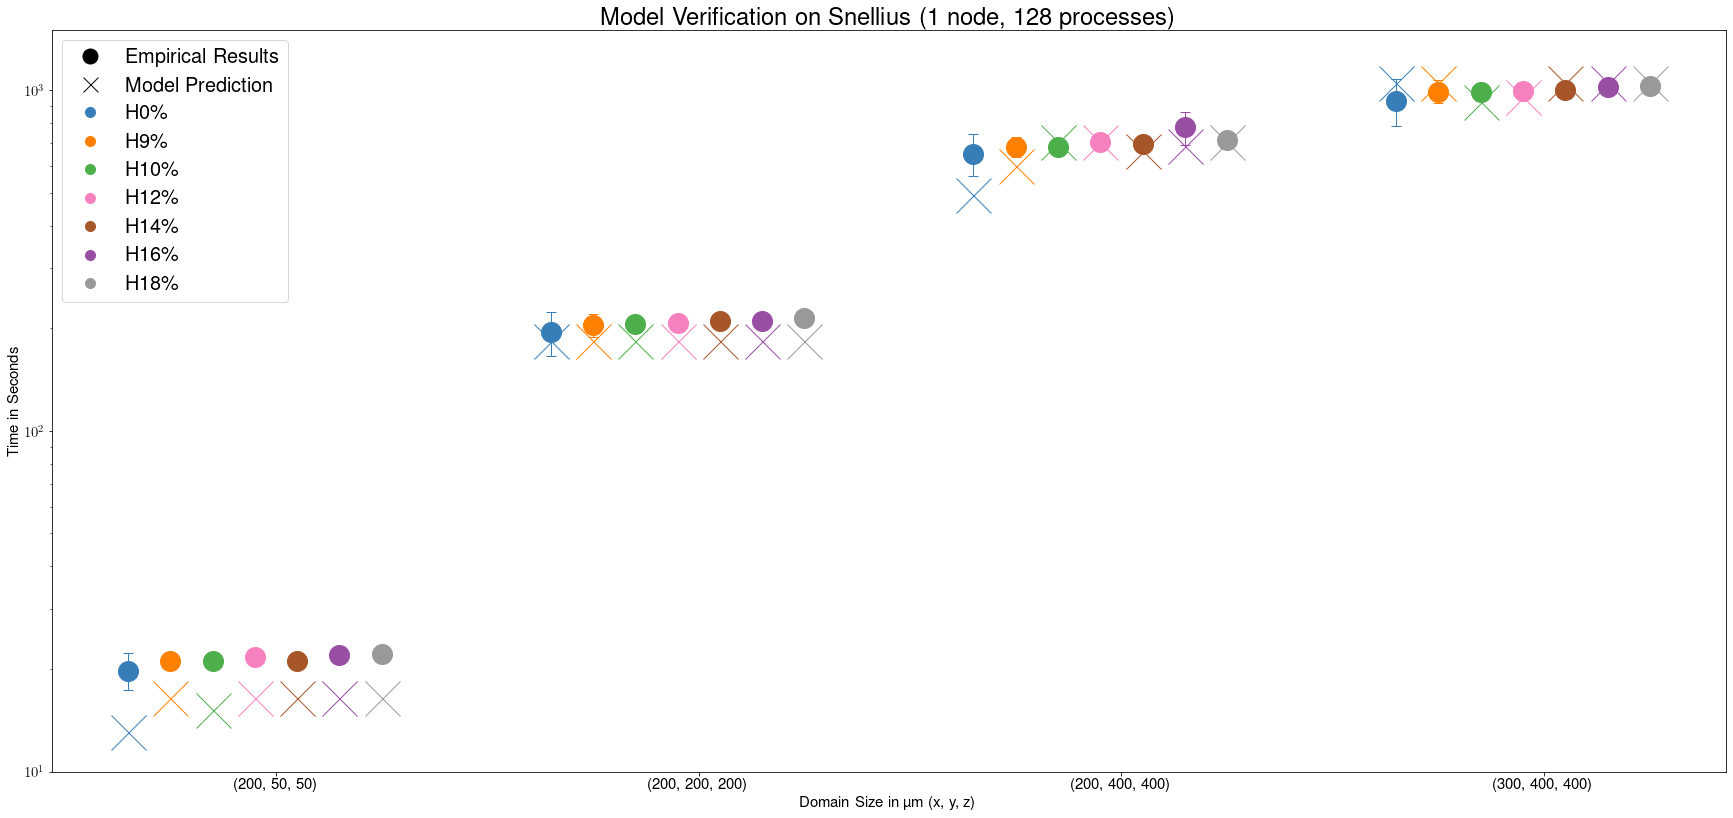

In [14]:
ids = np.unique(testing_df['jobid'])

new_data = []

for i in ids:
    tmpdf = raw_df.loc[raw_df['jobid'] == i]
    new_data.append([i, np.array(tmpdf['N'])[0], np.array(tmpdf['size'])[0], np.array(tmpdf['total_size'])[0], np.array(tmpdf['RBCs'])[0], np.array(tmpdf['H'])[0], np.array(tmpdf['total']).sum()])

tmpdf = pd.DataFrame(new_data, columns=['jobid', 'N', 'size', 'total_size', 'RBCs', 'H', 'total'])

def unique(x, axis=0):
    seen = []
    new = []
    
    for tmp in x:
        if tmp[axis] not in seen:
            seen.append(tmp[axis])
            new.append(tmp)
    return np.sort(np.array(new, dtype=object), axis=0)

fig = plt.figure(figsize=(30, 30))
ax = fig.add_subplot(2, 1, 1)

fit_exp_df = exp_df.loc[exp_df['sizestr'].isin(testing_sizes)].sort_values("N")
# print(fit_exp_df)

width = .7
stride = width / np.unique(np.sort(fit_exp_df['H'])).size

for i, sizestr in enumerate(pd.unique(fit_exp_df['sizestr'])):
    s = np.array(fit_exp_df.loc[fit_exp_df['sizestr'] == sizestr]['size'])[0]
    
    legend_handels = []
    offset = width/2
    for hi, H in enumerate(np.unique(np.sort(fit_exp_df['H']))):
        t = fit_exp_df.loc[fit_exp_df['sizestr'] == sizestr]
        r = np.array(t.loc[t['H'] == H]['RBCs'])[0]

        tmp = tmpdf.loc[tmpdf['H'] == H]
        tmp = tmp.loc[tmp['size'] == s]
        
        plt.errorbar(i - offset, np.mean(tmp['total']), yerr=np.std(tmp['total']), ms=40, color=CB_color_cycle[hi], fmt=".", capsize=5, lw=1)
        plt.plot(i - offset, run_model(models, s, r), 'x', color=CB_color_cycle[hi], ms=35)
        
        offset -= stride
        legend_handels.append( Line2D([0], [0], color=CB_color_cycle[hi], lw=0, marker='o', ms=10, label='H{}\%'.format(H)))
        # legend_handels.append( Line2D([0], [0], color=CB_color_cycle[hi], lw=0, marker='x', label='H{}\ Prediction%'.format(H)))

legend_handels.insert(0, Line2D([0], [0], color='k', lw=0, marker='x', ms=15, label='Model Prediction'.format(H)))        
legend_handels.insert(0, Line2D([0], [0], color='k', lw=0, marker='o', ms=15, label='Empirical Results'.format(H)))

plt.rcParams.update({'font.size': 20})
plt.rcParams.update({'font.weight': 'bold'})

plt.legend(handles=legend_handels)
plt.ylim(10, 1500)
ax.set_yscale('log')
plt.ylabel("Time in Seconds")
plt.xlabel("Domain Size in µm (x, y, z)")
plt.title("Model Verification on Snellius (1 node, 128 processes)")
# plt.xticks(, pd.unique(fit_exp_df['sizestr']), rotation='vertical')
plt.xticks(range(np.unique(np.sort(fit_exp_df['total_size'])).size), [ "({:g}, {:g}, {:g})".format(0.5 * x[0], 0.5 * x[1],0.5 * x[2])  for x in pd.unique(fit_exp_df['total_size'])])
# plt.tight_layout()
plt.savefig("model-prediction_snellius.png", bbox_inches='tight', dpi=300)

In [15]:
ids = np.unique(testing_df['jobid'])

new_data = []

for i in ids:
    tmpdf = testing_df.loc[testing_df['jobid'] == i]
    new_data.append([i, np.array(tmpdf['size'])[0], np.array(tmpdf['RBCs'])[0], np.array(tmpdf['total']).sum()])

tmpdf = pd.DataFrame(new_data, columns=['jobid', 'size', 'RBCs', 'total'])

sizes = np.unique(tmpdf['size'])
RBCs = np.unique(tmpdf['RBCs'])

new_data = []
for size in sizes:
    for rbc in RBCs:
        tmp = tmpdf.loc[tmpdf['size'] == size]
        tmp = tmp.loc[tmpdf['RBCs'] == rbc]
        if len(tmp['total']) == 0:
            continue
        
        prediciton = run_model(models, size, rbc)
        mse = ((np.array(tmp['total']) - prediciton) ** 2).mean()

        new_data.append([size, rbc.round(2), np.mean(tmp['total']).round(2), np.std(np.array(tmp['total'])).round(2), prediciton.round(2), mse.round(2)])
        
predictiondf = pd.DataFrame(new_data, columns=['size', 'RBCs', 'mean', 'std', 'prediction', 'mse'])
print(predictiondf.style.to_latex())
predictiondf

\begin{tabular}{llrrrrr}
 & size & RBCs & mean & std & prediction & mse \\
0 & (50, 25, 25) & 0.000000 & 16.330000 & 0.000000 & 13.110000 & 10.380000 \\
1 & (50, 25, 25) & 3.910000 & 19.650000 & 0.000000 & 14.780000 & 23.740000 \\
2 & (50, 25, 25) & 4.690000 & 20.070000 & 0.000000 & 15.110000 & 24.590000 \\
3 & (50, 25, 25) & 5.470000 & 20.200000 & 0.000000 & 15.450000 & 22.600000 \\
4 & (50, 25, 25) & 6.250000 & 19.740000 & 0.000000 & 15.780000 & 15.660000 \\
5 & (50, 25, 25) & 7.030000 & 22.010000 & 0.000000 & 16.120000 & 34.750000 \\
6 & (50, 25, 25) & 7.810000 & 21.910000 & 0.390000 & 16.450000 & 29.960000 \\
7 & (100, 100, 50) & 0.000000 & 153.550000 & 0.000000 & 129.910000 & 558.560000 \\
8 & (100, 100, 50) & 62.500000 & 182.850000 & 0.000000 & 156.660000 & 685.810000 \\
9 & (100, 100, 50) & 75.000000 & 190.920000 & 0.000000 & 162.010000 & 835.630000 \\
10 & (100, 100, 50) & 87.500000 & 194.230000 & 0.000000 & 167.360000 & 721.580000 \\
11 & (100, 100, 50) & 100.000000 & 200.3600

,size,RBCs,mean,std,prediction,mse
0,"(50, 25, 25)",0.00,16.33,0.00,13.11,10.38
1,"(50, 25, 25)",3.91,19.65,0.00,14.78,23.74
2,"(50, 25, 25)",4.69,20.07,0.00,15.11,24.59
3,"(50, 25, 25)",5.47,20.20,0.00,15.45,22.60
4,"(50, 25, 25)",6.25,19.74,0.00,15.78,15.66
5,"(50, 25, 25)",7.03,22.01,0.00,16.12,34.75
6,"(50, 25, 25)",7.81,21.91,0.39,16.45,29.96
7,"(100, 100, 50)",0.00,153.55,0.00,129.91,558.56
8,"(100, 100, 50)",62.50,182.85,0.00,156.66,685.81
9,"(100, 100, 50)",75.00,190.92,0.00,162.01,835.63


   sizestr             size       total_size        N   H      RBCs  n
36      s2     (50, 25, 25)  (400, 100, 100)    31250   9    7.8125  3
35      s2     (50, 25, 25)  (400, 100, 100)    31250   0    0.0000  3
37      s2     (50, 25, 25)  (400, 100, 100)    31250  10    4.6875  3
38      s2     (50, 25, 25)  (400, 100, 100)    31250  12    7.8125  3
39      s2     (50, 25, 25)  (400, 100, 100)    31250  14    7.8125  3
40      s2     (50, 25, 25)  (400, 100, 100)    31250  16    7.8125  3
41      s2     (50, 25, 25)  (400, 100, 100)    31250  18    7.8125  3
54      s4   (100, 100, 50)  (400, 400, 400)   500000  16  125.0000  3
55      s4   (100, 100, 50)  (400, 400, 400)   500000  18  125.0000  3
53      s4   (100, 100, 50)  (400, 400, 400)   500000  14  125.0000  3
51      s4   (100, 100, 50)  (400, 400, 400)   500000  10  125.0000  3
49      s4   (100, 100, 50)  (400, 400, 400)   500000   0  125.0000  3
52      s4   (100, 100, 50)  (400, 400, 400)   500000  12  125.0000  3
50    

<Figure size 1080x1080 with 0 Axes>

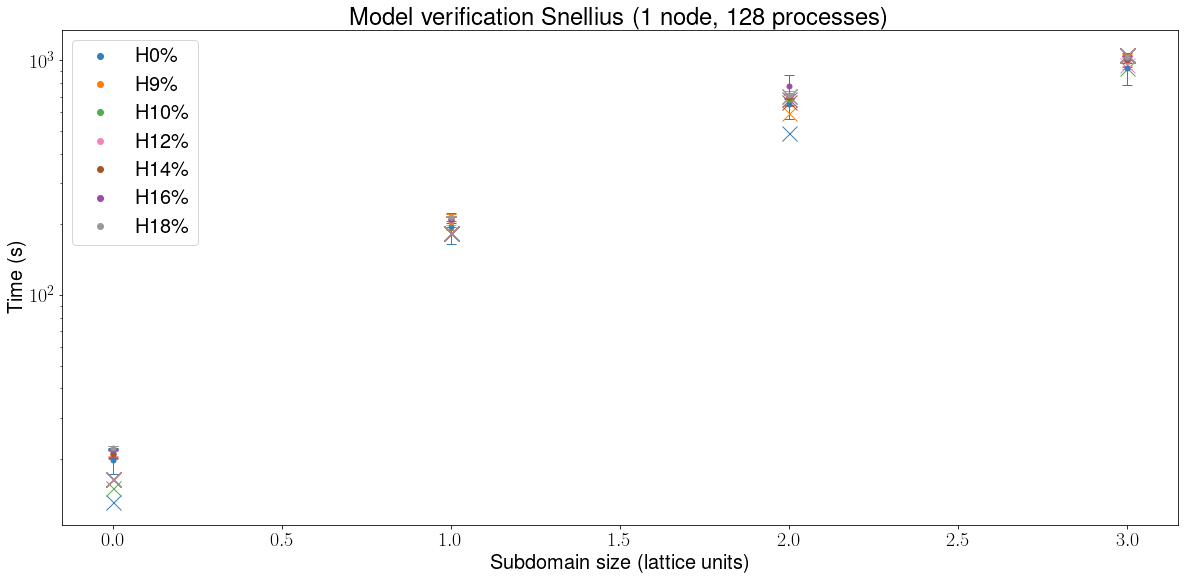

In [16]:
ids = np.unique(testing_df['jobid'])

new_data = []

for i in ids:
    tmpdf = raw_df.loc[raw_df['jobid'] == i]
    new_data.append([i, np.array(tmpdf['N'])[0], np.array(tmpdf['size'])[0], np.array(tmpdf['total_size'])[0], np.array(tmpdf['RBCs'])[0], np.array(tmpdf['H'])[0], np.array(tmpdf['total']).sum()])

tmpdf = pd.DataFrame(new_data, columns=['jobid', 'N', 'size', 'total_size', 'RBCs', 'H', 'total'])
plt.figure(figsize=(15, 15))

# print(tmpdf)    print(d['N'])

def unique(x, axis=0):
    seen = []
    new = []
    
    for tmp in x:
        if tmp[axis] not in seen:
            seen.append(tmp[axis])
            new.append(tmp)
    return np.sort(np.array(new, dtype=object), axis=0)

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(2, 1, 1)

fit_exp_df = exp_df.loc[exp_df['sizestr'].isin(testing_sizes)].sort_values("N")
print(fit_exp_df)


for i, sizestr in enumerate(pd.unique(fit_exp_df['sizestr'])):
    s = np.array(fit_exp_df.loc[fit_exp_df['sizestr'] == sizestr]['size'])[0]
    
    legend_handels = []
    for hi, H in enumerate(np.unique(np.sort(fit_exp_df['H']))):
        t = fit_exp_df.loc[fit_exp_df['sizestr'] == sizestr]
        r = np.array(t.loc[t['H'] == H]['RBCs'])[0]

        tmp = tmpdf.loc[tmpdf['H'] == H]
        tmp = tmp.loc[tmp['size'] == s]
        
        plt.errorbar(i, np.mean(tmp['total']), yerr=np.std(tmp['total']), ms=10, color=CB_color_cycle[hi], fmt=".", capsize=5, lw=1, )
        plt.plot(i, run_model(models, s, r), 'x', color=CB_color_cycle[hi], ms=15)
        
        legend_handels.append( Line2D([0], [0], color=CB_color_cycle[hi], lw=0, marker='o', label='H{}\%'.format(H)))
        

plt.legend(handles=legend_handels)
ax.set_yscale('log')
plt.ylabel("Time (s)")
plt.xlabel("Subdomain size (lattice units)")
plt.title("Model verification Snellius (1 node, 128 processes)")
# plt.xticks(, pd.unique(fit_exp_df['sizestr']), rotation='vertical')
# plt.xticks(range(np.unique(np.sort(fit_exp_df['sizestr'])).size), [np.array(fit_exp_df.loc[fit_exp_df['sizestr']==x]['size'])[0] for x in pd.unique(fit_exp_df['total_size'])])
# plt.tight_layout()
plt.savefig("model-prediction_snellius.pdf", bbox_inches='tight')
plt.savefig("model-prediction_snellius.svg", bbox_inches='tight')

In [17]:
testing_df

,jobid,sizestr,size,total_size,N,area,RBCs,H,component,total,comm,comp
32,535851,s2,"(50, 25, 25)","(400, 100, 100)",31250,6250,7.81250,16,spreadParticleForce,3.053270,1.520030,1.533240
33,535851,s2,"(50, 25, 25)","(400, 100, 100)",31250,6250,7.81250,16,collideAndStream,11.748100,1.890370,9.857710
34,535851,s2,"(50, 25, 25)","(400, 100, 100)",31250,6250,7.81250,16,interpolateFluidVelocity,1.053110,0.530720,0.522386
35,535851,s2,"(50, 25, 25)","(400, 100, 100)",31250,6250,7.81250,16,syncEnvelopes,1.296760,0.554811,0.741951
36,535851,s2,"(50, 25, 25)","(400, 100, 100)",31250,6250,7.81250,16,advanceParticles,2.775380,1.904640,0.870741
...,...,...,...,...,...,...,...,...,...,...,...,...
2035,532820,s2,"(50, 25, 25)","(400, 100, 100)",31250,6250,7.03125,16,syncEnvelopes,1.251660,0.891754,0.359907
2036,532820,s2,"(50, 25, 25)","(400, 100, 100)",31250,6250,7.03125,16,advanceParticles,2.817480,2.082570,0.734912
2037,532820,s2,"(50, 25, 25)","(400, 100, 100)",31250,6250,7.03125,16,applyConstitutiveModel,0.222001,0.033415,0.188586
2038,532820,s2,"(50, 25, 25)","(400, 100, 100)",31250,6250,7.03125,16,deleteNonLocalParticles,0.091742,0.000000,0.091742


(50, 25, 25) & 0\% & $\num{19.7876}\pm \num{2.4660}$& $\num{13.1081}$ & $\num{33.7563}$\\
(50, 25, 25) & 9\% & $\num{21.0846}\pm \num{1.0146}$& $\num{16.4518}$ & $\num{21.9723}$\\
(50, 25, 25) & 10\% & $\num{21.1200}\pm \num{0.7402}$& $\num{15.1143}$ & $\num{28.4360}$\\
(50, 25, 25) & 12\% & $\num{21.6713}\pm \num{1.0457}$& $\num{16.4518}$ & $\num{24.0846}$\\
(50, 25, 25) & 14\% & $\num{21.1036}\pm \num{0.9778}$& $\num{16.4518}$ & $\num{22.0426}$\\
(50, 25, 25) & 16\% & $\num{21.9411}\pm \num{0.0775}$& $\num{16.4518}$ & $\num{25.0183}$\\
(50, 25, 25) & 18\% & $\num{22.1843}\pm \num{0.4476}$& $\num{16.4518}$ & $\num{25.8404}$\\
(100, 100, 50) & 0\% & $\num{194.6265}\pm \num{29.0526}$& $\num{183.4134}$ & $\num{5.7614}$\\
(100, 100, 50) & 9\% & $\num{204.7937}\pm \num{15.5243}$& $\num{183.4134}$ & $\num{10.4399}$\\
(100, 100, 50) & 10\% & $\num{206.6803}\pm \num{11.1466}$& $\num{183.4134}$ & $\num{11.2574}$\\
(100, 100, 50) & 12\% & $\num{207.9915}\pm \num{9.7528}$& $\num{183.4134}$ & $\n

<Figure size 1080x1440 with 0 Axes>

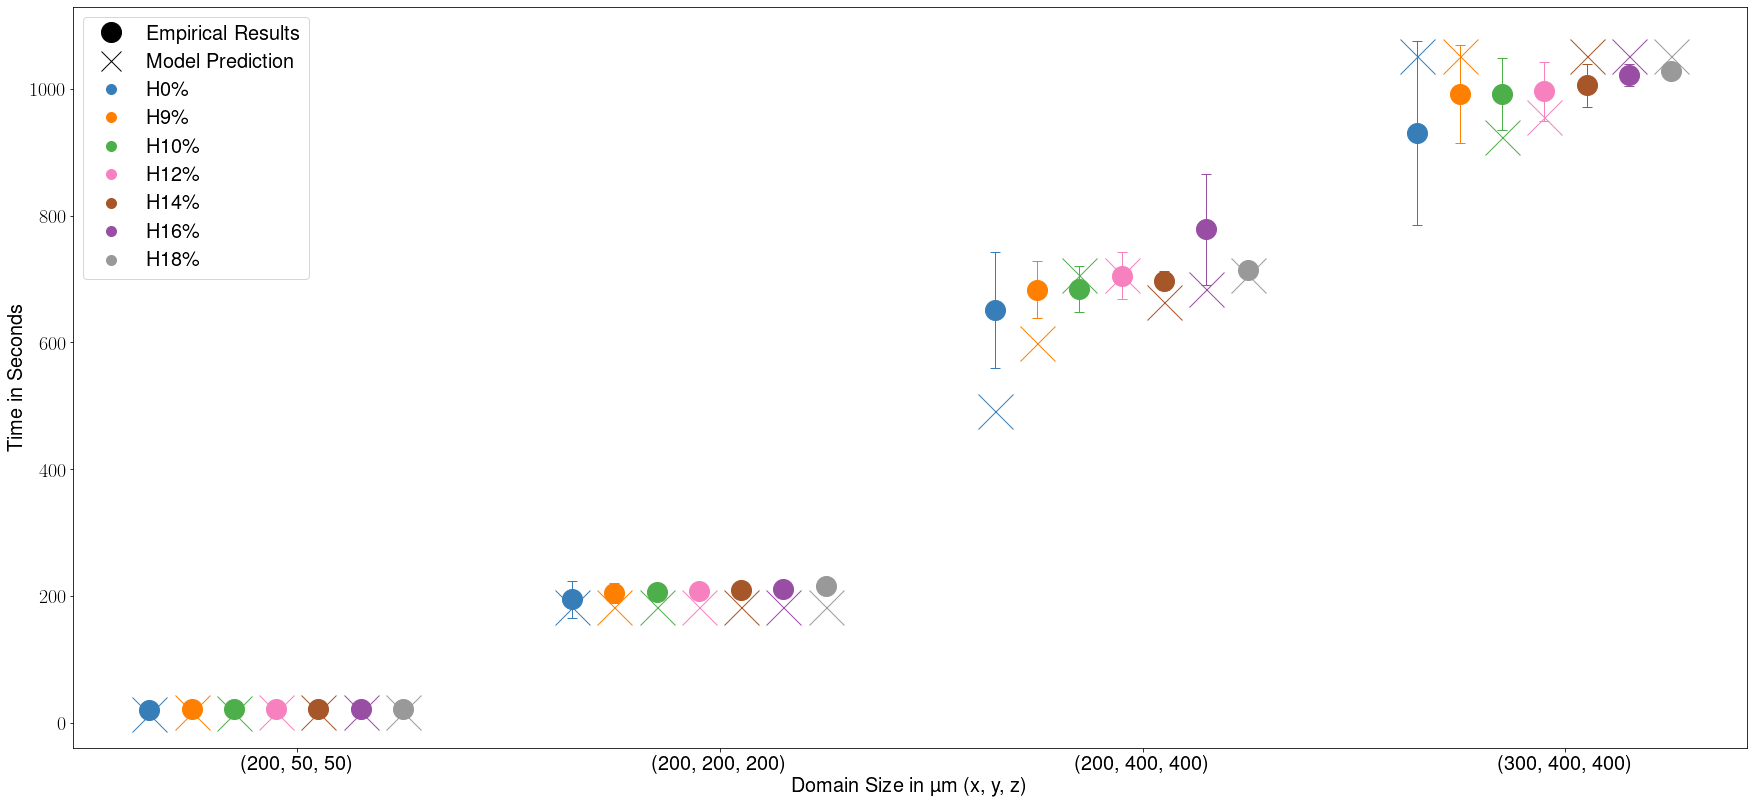

In [18]:
ids = np.unique(testing_df['jobid'])

new_data = []

for i in ids:
    tmpdf = raw_df.loc[raw_df['jobid'] == i]
    new_data.append([i, np.array(tmpdf['N'])[0], np.array(tmpdf['size'])[0], np.array(tmpdf['total_size'])[0], np.array(tmpdf['RBCs'])[0], np.array(tmpdf['H'])[0], np.array(tmpdf['total']).sum()])

tmpdf = pd.DataFrame(new_data, columns=['jobid', 'N', 'size', 'total_size', 'RBCs', 'H', 'total'])
plt.figure(figsize=(15, 20))

# print(tmpdf)    print(d['N'])

def unique(x, axis=0):
    seen = []
    new = []
    
    for tmp in x:
        if tmp[axis] not in seen:
            seen.append(tmp[axis])
            new.append(tmp)
    return np.sort(np.array(new, dtype=object), axis=0)

fig = plt.figure(figsize=(30, 30))
ax = fig.add_subplot(2, 1, 1)

fit_exp_df = exp_df.loc[exp_df['sizestr'].isin(testing_sizes)].sort_values("N")
# print(fit_exp_df)

width = .7
stride = width / np.unique(np.sort(fit_exp_df['H'])).size

for i, sizestr in enumerate(pd.unique(fit_exp_df['sizestr'])):
    s = np.array(fit_exp_df.loc[fit_exp_df['sizestr'] == sizestr]['size'])[0]
    
    legend_handels = []
    offset = width/2
    for hi, H in enumerate(np.unique(np.sort(fit_exp_df['H']))):
        t = fit_exp_df.loc[fit_exp_df['sizestr'] == sizestr]
        r = np.array(t.loc[t['H'] == H]['RBCs'])[0]

        tmp = tmpdf.loc[tmpdf['H'] == H]
        tmp = tmp.loc[tmp['size'] == s]
        
        
        plt.errorbar(i - offset, np.mean(tmp['total']), yerr=np.std(tmp['total']), ms=40, color=CB_color_cycle[hi], fmt=".", capsize=5, lw=1)
        plt.plot(i - offset, run_model(models, s, r), 'x', color=CB_color_cycle[hi], ms=35)
        # print(run_model(models, s, r))
        offset -= stride
        legend_handels.append( Line2D([0], [0], color=CB_color_cycle[hi], lw=0, marker='o', ms=10, label='H{}\%'.format(H)))
        # legend_handels.append( Line2D([0], [0], color=CB_color_cycle[hi], lw=0, marker='x', label='H{}\ Prediction%'.format(H)))
        pred = run_model(models, s, r)
        res = np.mean(tmp['total'])
        std = np.std(tmp['total'])
        err = np.abs(pred - res) * (100 / res)
        tmpstr = "{} & {}\% ".format(np.array(tmp["size"])[0],  H, )
        tmpstr += "& $\\num{{{0:.4f}}}".format(res)
        tmpstr += "\pm \\num{{{0:.4f}}}".format(std)
        tmpstr += "$& $\\num{{{0:.4f}}}".format(pred)
        tmpstr += "$ & $\\num{{{0:.4f}}}$\\\\".format(err)
        print(tmpstr)
        
legend_handels.insert(0, Line2D([0], [0], color='k', lw=0, marker='x', ms=20, label='Model Prediction'.format(H)))        
legend_handels.insert(0, Line2D([0], [0], color='k', lw=0, marker='o', ms=20, label='Empirical Results'.format(H)))

plt.rcParams.update({'font.size': 20})
# plt.rcParams.update({'axes.linewidth': 5})
plt.rcParams.update({'font.weight': 'bold'})
# plt.rcParams.update({'font.size': 20})

plt.legend(handles=legend_handels)
# ax.set_yscale('log')
# plt.ylim(10, 1500)
plt.ylabel("Time in Seconds")
plt.xlabel("Domain Size in µm (x, y, z)")
# plt.title("Model Verification on Snellius (1 node, 128 processes)")
# plt.xticks(, pd.unique(fit_exp_df['sizestr']), rotation='vertical')
plt.xticks(range(np.unique(np.sort(fit_exp_df['total_size'])).size), [ "({:g}, {:g}, {:g})".format(0.5 * x[0], 0.5 * x[1],0.5 * x[2])  for x in pd.unique(fit_exp_df['total_size'])])
# plt.tight_layout()
plt.savefig("model-prediction_snellius.pdf", bbox_inches='tight')
plt.savefig("model-prediction_snellius.svg", bbox_inches='tight')
plt.savefig("model-prediction_snellius.pdf", bbox_inches='tight')

In [19]:
import json

In [20]:
smodel = {}

for k in models.keys():
    for component in ["collideAndStream", "setExternalVector"]:
        res = models[component]
        smodel[component] = {'offset': res.intercept, 'N': res.slope}
    
    for component in ["collideAndStream_comm"]:
        res = models[component]
        smodel[component] = {'offset': res.intercept, 'area': res.slope}
        
    for component in ["syncEnvelopes", "advanceParticles", "applyConstitutiveModel", "deleteNonLocalParticles", "spreadParticleForce", "interpolateFluidVelocity"]:
        res = models[component]
        smodel[component] = {'offset': res.intercept, 'RBCs': res.slope}

        
    for component in ["syncEnvelopes_comm"]:
        popt = models[component]
        smodel[component] = {'offset': popt[0], 'RBCs': popt[2], 'area': popt[1]}
jsonstr = json.dumps(smodel)
print(jsonstr)

{"collideAndStream": {"offset": 2.6541003527985865, "N": 0.00020076190100649767}, "setExternalVector": {"offset": 0.1568629274096267, "N": 3.0557428451375e-05}, "collideAndStream_comm": {"offset": 0.25823615018164414, "area": 0.00026029203962343606}, "syncEnvelopes": {"offset": 0.07828840234367496, "RBCs": 0.05786462401269385}, "advanceParticles": {"offset": 0.15217004759318975, "RBCs": 0.0716656098120107}, "applyConstitutiveModel": {"offset": 0.03848614248883475, "RBCs": 0.019508461069449746}, "deleteNonLocalParticles": {"offset": 0.04689452743460282, "RBCs": 0.012111708596878728}, "spreadParticleForce": {"offset": 0.25393709202688797, "RBCs": 0.1967781763192387}, "interpolateFluidVelocity": {"offset": 0.14512805024934683, "RBCs": 0.03971178685526732}, "syncEnvelopes_comm": {"offset": 0.5444131234835587, "RBCs": 0.030358771219139366, "area": -1.2159063547030089e-05}}


In [21]:
smodel

{'collideAndStream': {'offset': 2.6541003527985865,
  'N': 0.00020076190100649767},
 'setExternalVector': {'offset': 0.1568629274096267, 'N': 3.0557428451375e-05},
 'collideAndStream_comm': {'offset': 0.25823615018164414,
  'area': 0.00026029203962343606},
 'syncEnvelopes': {'offset': 0.07828840234367496, 'RBCs': 0.05786462401269385},
 'advanceParticles': {'offset': 0.15217004759318975,
  'RBCs': 0.0716656098120107},
 'applyConstitutiveModel': {'offset': 0.03848614248883475,
  'RBCs': 0.019508461069449746},
 'deleteNonLocalParticles': {'offset': 0.04689452743460282,
  'RBCs': 0.012111708596878728},
 'spreadParticleForce': {'offset': 0.25393709202688797,
  'RBCs': 0.1967781763192387},
 'interpolateFluidVelocity': {'offset': 0.14512805024934683,
  'RBCs': 0.03971178685526732},
 'syncEnvelopes_comm': {'offset': 0.5444131234835587,
  'RBCs': 0.030358771219139366,
  'area': -1.2159063547030089e-05}}

In [22]:
iters = 500

for k in smodel.keys():
    tmp = "$\\num{{{0:.2g}}}".format(smodel[k]['offset'] / 500.0)
    if 'N' in smodel[k].keys():
        tmp += " + V \\times \\num{{{0:.2g}}}".format(smodel[k]['N'] / 500.0)
    if 'area' in smodel[k].keys():
        tmp += " + SA \\times \\num{{{0:.2g}}}".format(smodel[k]['area'] / 500.0)
    if 'RBCs' in smodel[k].keys():
        tmp += " + RBCs \\times \\num{{{0:.2g}}}".format(smodel[k]['RBCs'] / 500.0)
        
    tmp += "$"
    print("{} & {}\\\\".format(k, tmp))

collideAndStream & $\num{0.0053} + V \times \num{4e-07}$\\
setExternalVector & $\num{0.00031} + V \times \num{6.1e-08}$\\
collideAndStream_comm & $\num{0.00052} + SA \times \num{5.2e-07}$\\
syncEnvelopes & $\num{0.00016} + RBCs \times \num{0.00012}$\\
advanceParticles & $\num{0.0003} + RBCs \times \num{0.00014}$\\
applyConstitutiveModel & $\num{7.7e-05} + RBCs \times \num{3.9e-05}$\\
deleteNonLocalParticles & $\num{9.4e-05} + RBCs \times \num{2.4e-05}$\\
spreadParticleForce & $\num{0.00051} + RBCs \times \num{0.00039}$\\
interpolateFluidVelocity & $\num{0.00029} + RBCs \times \num{7.9e-05}$\\
syncEnvelopes_comm & $\num{0.0011} + SA \times \num{-2.4e-08} + RBCs \times \num{6.1e-05}$\\
